# Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/sexism_dataset.csv')

In [ ]:
data.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


# Data Preprocessing

In [ ]:
columns_to_remove = ['rewire_id', 'label_category', 'label_vector']
data = data.drop(columns_to_remove, axis=1)

data.head()

,text,label_sexist
0,"Damn, this writing was pretty chaotic",not sexist
1,"Yeah, and apparently a bunch of misogynistic v...",not sexist
2,How the FUCK is this woman still an MP!!!???,not sexist
3,Understand. Know you're right. At same time I ...,not sexist
4,Surprized they didn't stop and rape some women,not sexist


In [ ]:
data['text'] = data['text'].str.replace('\[URL\]', '', regex=True)

# Data Visualization

not sexist    10602
sexist         3398
Name: label_sexist, dtype: int64
Proportion: 3.12 : 1


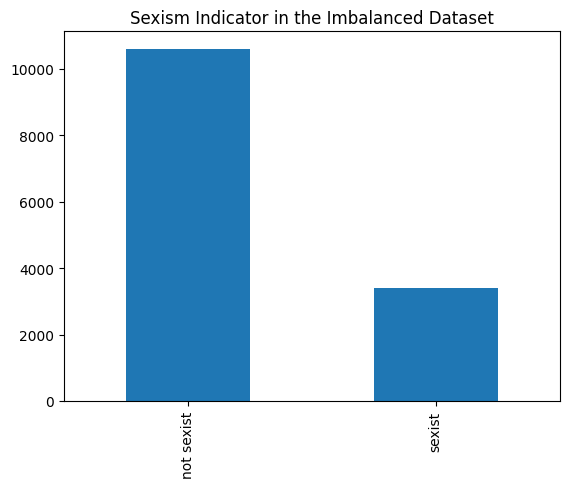

In [ ]:
count = data['label_sexist'].value_counts()
print(count)
print('Proportion:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='Sexism Indicator in the Imbalanced Dataset');

Most common words in texts which are Not Sexist

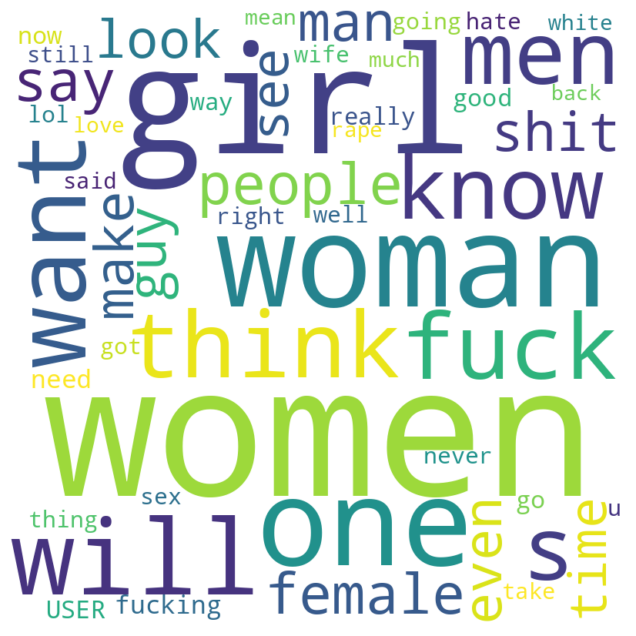

In [ ]:
# separate sexist and not sexist examples
sexist_examples = data[data['label_sexist'] == 'sexist']['text']
not_sexist_examples = data[data['label_sexist'] == 'not sexist']['text']

# create word clouds for not sexist examples
not_sexist_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(not_sexist_examples))
plt.figure(figsize=(8,8))
plt.imshow(not_sexist_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most common words in texts which are Sexist

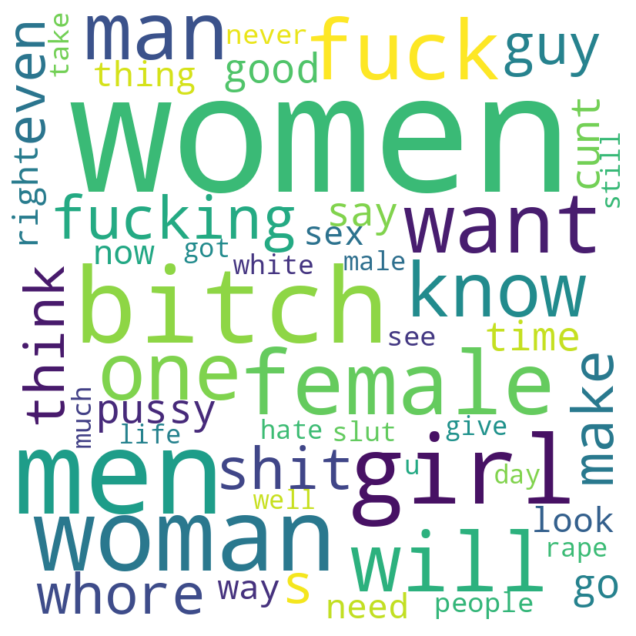

In [ ]:
# create word clouds for sexist examples
sexist_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(' '.join(sexist_examples))
plt.figure(figsize=(8,8))
plt.imshow(sexist_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Balancing the Dataset

In [ ]:
# Split the data into two subsets based on the "label_sexist" column
sexist_examples = data[data['label_sexist'] == 'sexist']
not_sexist_examples = data[data['label_sexist'] == 'not sexist']

# Determine the size of the minority and majority classes
minority_size = len(sexist_examples)
majority_size = len(not_sexist_examples)

# Compute the oversampling ratio
oversampling_ratio = int(majority_size / minority_size)

# Oversample the minority class by duplicating examples
oversampled_sexist_examples = sexist_examples.sample(n=minority_size * oversampling_ratio, replace=True)

# Combine the oversampled minority class with the majority class
balanced_data = pd.concat([not_sexist_examples, oversampled_sexist_examples])

# Shuffle the rows of the data to avoid any bias
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

not sexist    10602
sexist        10194
Name: label_sexist, dtype: int64
Proportion: 1.04 : 1


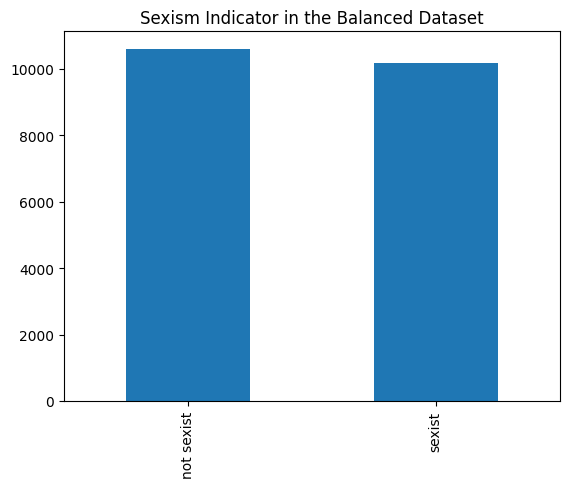

In [ ]:
count = balanced_data['label_sexist'].value_counts()
print(count)
print('Proportion:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='Sexism Indicator in the Balanced Dataset');

Train-Test Split

In [ ]:
x = np.array(balanced_data["text"])
y = np.array(balanced_data["label_sexist"])

cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 42)

# Decision Tree

In [ ]:
dt =  DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_test_prediction_dt = dt.predict(X_test)
print(y_test)
print(y_test_prediction_dt)

['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']
['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_test)

predicted_labels_dt = le.transform(y_test_prediction_dt)
actual_labels = le.transform(y_test)

print(predicted_labels_dt)
print(actual_labels)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

print('F1 Score:', f1_score(actual_labels, predicted_labels_dt))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_dt))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_dt))
print('Precision:', precision_score(actual_labels, predicted_labels_dt))
print('Recall:', recall_score(actual_labels, predicted_labels_dt))

F1 Score: 0.890315378174714
AUC-ROC: 0.886849362113138
Accuracy: 0.8854728252950604
Precision: 0.8374901548962982
Recall: 0.9502532022639262


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_test_prediction_lr = lr.predict(X_test)
print(y_test)
print(y_test_prediction_lr)

['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']
['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']


In [ ]:
predicted_labels_lr = le.transform(y_test_prediction_lr)

print(predicted_labels_lr)
print(actual_labels)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
print('F1 Score:', f1_score(actual_labels, predicted_labels_lr))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_lr))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_lr))
print('Precision:', precision_score(actual_labels, predicted_labels_lr))
print('Recall:', recall_score(actual_labels, predicted_labels_lr))

F1 Score: 0.8814440433212997
AUC-ROC: 0.8809844003751346
Accuracy: 0.8803730147165962
Precision: 0.8553811659192825
Recall: 0.9091450700029788


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_test_prediction_nb = nb.predict(X_test)
print(y_test)
print(y_test_prediction_nb)

['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']
['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']


In [ ]:
predicted_labels_nb = le.transform(y_test_prediction_nb)

print(predicted_labels_nb)
print(actual_labels)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
print('F1 Score:', f1_score(actual_labels, predicted_labels_nb))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_nb))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_nb))
print('Precision:', precision_score(actual_labels, predicted_labels_nb))
print('Recall:', recall_score(actual_labels, predicted_labels_nb))

F1 Score: 0.82557200538358
AUC-ROC: 0.8133383326357759
Accuracy: 0.8111612997231531
Precision: 0.7530076110974712
Recall: 0.9136133452487339


# SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_test_prediction_svc = svc.predict(X_test)
print(y_test)
print(y_test_prediction_svc)

['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']
['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']


In [ ]:
predicted_labels_svc = le.transform(y_test_prediction_svc)

print(predicted_labels_svc)
print(actual_labels)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
print('F1 Score:', f1_score(actual_labels, predicted_labels_svc))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_svc))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_svc))
print('Precision:', precision_score(actual_labels, predicted_labels_svc))
print('Recall:', recall_score(actual_labels, predicted_labels_svc))

F1 Score: 0.886904761904762
AUC-ROC: 0.8847518896496597
Accuracy: 0.8837243188110155
Precision: 0.845904298459043
Recall: 0.9320822162645219


# Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)

MLPClassifier()

In [ ]:
y_test_prediction_nn = nn.predict(X_test)
print(y_test)
print(y_test_prediction_nn)

['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']
['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']


In [ ]:
predicted_labels_nn = le.transform(y_test_prediction_nn)

print(predicted_labels_nn)
print(actual_labels)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
print('F1 Score:', f1_score(actual_labels, predicted_labels_nn))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_nn))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_nn))
print('Precision:', precision_score(actual_labels, predicted_labels_nn))
print('Recall:', recall_score(actual_labels, predicted_labels_nn))

F1 Score: 0.8851266265565971
AUC-ROC: 0.8816870130799221
Accuracy: 0.8803730147165962
Precision: 0.8345646437994723
Recall: 0.9422103068215669


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = MLPClassifier()
rf.fit(X_train, y_train)

MLPClassifier()

In [ ]:
y_test_prediction_rf = rf.predict(X_test)
print(y_test)
print(y_test_prediction_rf)

['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']
['sexist' 'sexist' 'sexist' ... 'sexist' 'sexist' 'sexist']


In [ ]:
predicted_labels_rf = le.transform(y_test_prediction_rf)

print(predicted_labels_rf)
print(actual_labels)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
print('F1 Score:', f1_score(actual_labels, predicted_labels_rf))
print('AUC-ROC:', roc_auc_score(actual_labels, predicted_labels_rf))
print('Accuracy:', accuracy_score(actual_labels, predicted_labels_rf))
print('Precision:', precision_score(actual_labels, predicted_labels_rf))
print('Recall:', recall_score(actual_labels, predicted_labels_rf))

F1 Score: 0.8883277216610549
AUC-ROC: 0.8852713192125979
Accuracy: 0.8840157365583564
Precision: 0.8395651020949351
Recall: 0.9431039618707179
